In [78]:
import os

import pandas as pd
import pickle as pkl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy

%matplotlib inline
cmap = sns.diverging_palette(10, 240, as_cmap=True)

### Helper Functions + Settings (Load Data)

In [79]:
def load_data(run_name='1'):
    path = './data/' + run_name + '/scores/'
    scores = []
    i = 0

    for file in os.listdir(path):
        if file.endswith('.p'):
            score_dict = pkl.load(open(path + '/' + file, 'rb'))        
            missing = 0

            if file.startswith('m'):
                split_file = file.split('_')
                missing = float(split_file[0][1:])
                split_file = split_file[1:]  
            else:
                split_file = file.split('_')

            for s in score_dict.keys():
                score = {}
                score['missing'] = missing
                score['model'] = int(split_file[0])
                score['effects'] = int(split_file[1])
                score['per_effect'] = int(split_file[2])
                score['mag'] = float(split_file[3])
                score['observed'] = int(split_file[4])
                score['trial'] = int(split_file[5].split('.')[0])+1
                score['patients'] = s

                for m in score_dict[s]:
                    score[m] = np.mean(score_dict[s][m])

                scores.append(score)

    df = pd.DataFrame(scores)
    print(df.columns)
    df = df.rename(columns={'fullrfc': 'Random Forest', 'rfc': 'Limited Random Forest', 
                            'nearest_neighbors': 'Nearest Neighbors', 'svm': 'SVM', 
                            'tree': 'Decision Tree', 'da_10000_2_fullrfc': 'DA (2)',
                            'da_10000_4_fullrfc': 'DA (4)', 'da_10000_8_fullrfc': 'DA (8)',
                            'da_10000_16_fullrfc': 'DA (16)'})
    df['diff'] = df[da_classifier] - df[comparison_classifier]
    df = df[np.isfinite(df['missing'])]
    return df

import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from sklearn.utils.extmath import _ravel

import theano
import theano.tensor as T

# Random state.
RS = 42356

import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

import seaborn as sns

from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    txts = []
    for i in range(2):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts


font = {'weight' : 'bold',
        'size'   : 24}
da_classifier = "DA (2)"
comparison_classifier = "SVM"

### Figure 2

 For cloud continuous integration purposes we reduce the amount plotted. Simply change the value below to increase.

In [80]:
plot_count = 500

directory = './data/1/patients/'
file_name = directory + '1_4_5_4_200_0.p'

with open(file_name, 'rb') as f:
    p_array = pkl.load(f)
classes = p_array[:, -1]
print(p_array.shape, classes[(0 == classes)].size, classes[(1 == classes)].size)

X = p_array[:plot_count, :-1]
y = p_array[:plot_count, -1].astype(int)

(10000, 201) 5000 5000


A.) 

(<matplotlib.figure.Figure at 0x117f38780>,
  <matplotlib.text.Text at 0x118079588>])

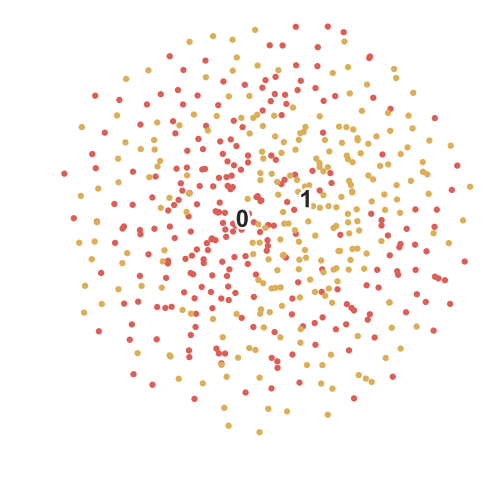

In [81]:
X_tsne = np.vstack([X[y==i]
               for i in range(2)])
y_tsne = np.hstack([y[y==i]
               for i in range(2)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)

B.) 0

(<matplotlib.figure.Figure at 0x118099438>,
  <matplotlib.text.Text at 0x116743cc0>])

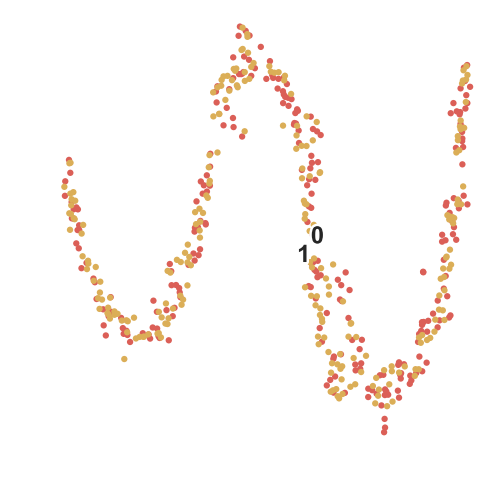

In [82]:
i_theano = T.dmatrix('i_theano')
f = open('./data/1/trained/2_0.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(2)])
y_tsne = np.hstack([y[y==i]
               for i in range(2)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)

C.) 10

(<matplotlib.figure.Figure at 0x116765208>,
  <matplotlib.text.Text at 0x11804a4a8>])

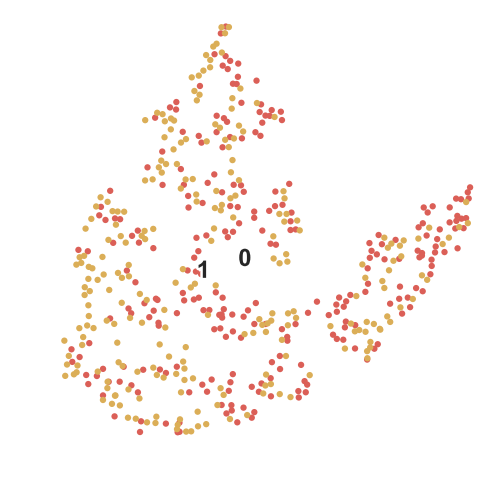

In [83]:
i_theano = T.dmatrix('i_theano')
f = open('./data/1/trained/2_10.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(2)])
y_tsne = np.hstack([y[y==i]
               for i in range(2)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)

D.) 100

(<matplotlib.figure.Figure at 0x1174ac978>,
  <matplotlib.text.Text at 0x11960eb70>])

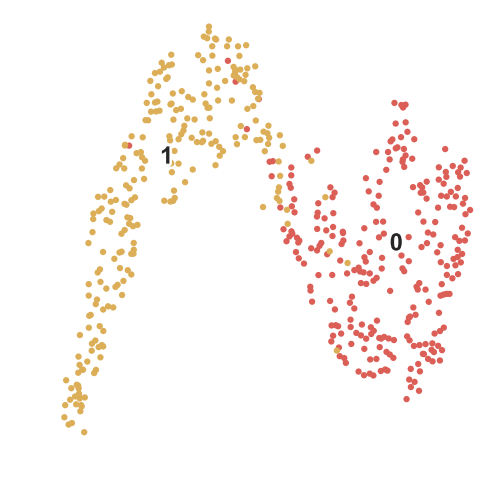

In [84]:
i_theano = T.dmatrix('i_theano')
f = open('./data/1/trained/2_100.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(2)])
y_tsne = np.hstack([y[y==i]
               for i in range(2)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)

E.) 1,000

(<matplotlib.figure.Figure at 0x117466d30>,
  <matplotlib.text.Text at 0x118f58588>])

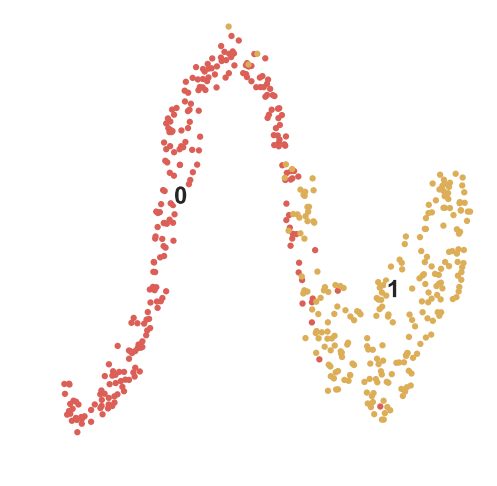

In [85]:
i_theano = T.dmatrix('i_theano')
f = open('./data/1/trained/2_1000.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(2)])
y_tsne = np.hstack([y[y==i]
               for i in range(2)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)

F.) 10,000

(<matplotlib.figure.Figure at 0x1172bff28>,
  <matplotlib.text.Text at 0x11d9afc50>])

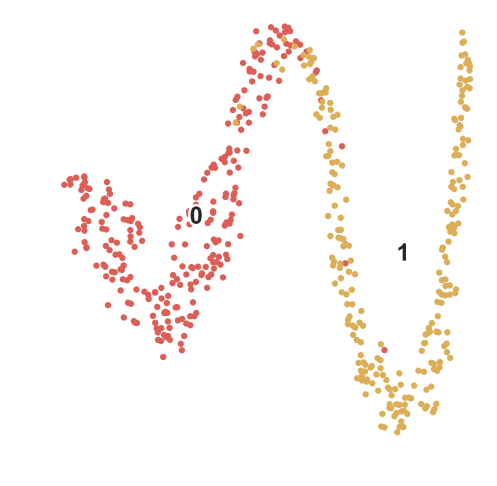

In [86]:
i_theano = T.dmatrix('i_theano')
f = open('./data/1/trained/2_10000.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(2)])
y_tsne = np.hstack([y[y==i]
               for i in range(2)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)

### Figure 3

Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'effects', 'fullrfc', 'mag',
       'missing', 'model', 'nearest_neighbors', 'observed', 'patients',
       'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


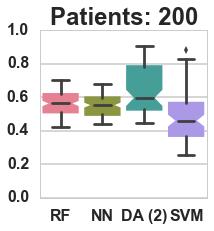

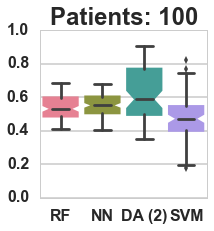

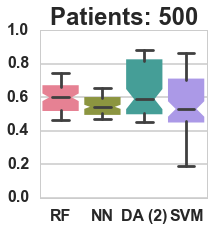

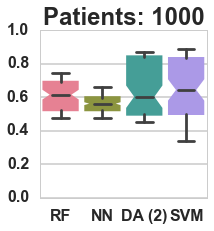

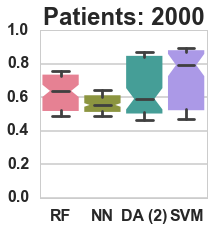

In [87]:
df = load_data('1')

for p in df['patients'].unique():
    df_select = df.loc[(df['patients'] == p) & (df['mag'] == 2)]
    four_col = df_select[['Random Forest', 'Nearest Neighbors', 'DA (2)', 'SVM']] #, 'da_2000_2_tree', 'svm']]
    four_col = four_col.rename(columns={'Random Forest':'RF', 'DA (10000)':'DA',
                       'Nearest Neighbors': 'NN', 'svm': 'SVM'})
    
    plt.figure(figsize=(3,3), )
    plt.rc('font', **font)
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=four_col, notch=True, palette="husl")
    g.set_ylim([0, 1])
    g.set_title('Patients: ' + str(p), fontdict=font)

Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'effects', 'fullrfc', 'mag',
       'missing', 'model', 'nearest_neighbors', 'observed', 'patients',
       'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


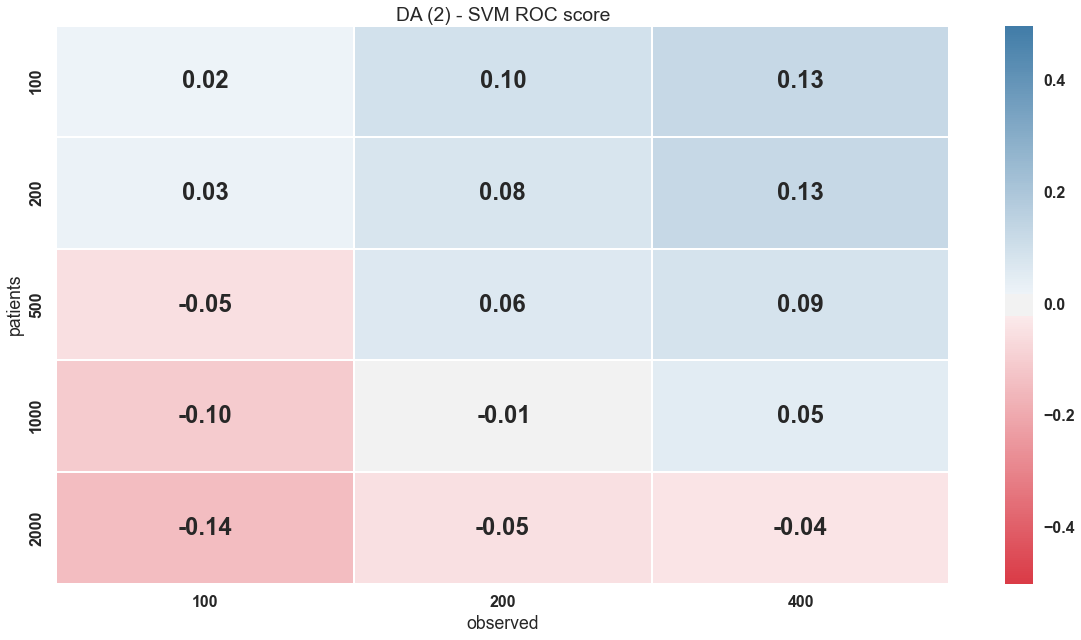

In [61]:
df = load_data('1')
plt.figure(figsize=(20,10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="observed", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt=".2f", vmin=-0.5, vmax=0.5, cmap=cmap, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score') 

### Figure 4

A.) Model 2

A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')
RF        0.756767
NN        0.684536
SVM       0.696981
DA (8)    0.833889
DA (4)    0.849974
DA (2)    0.694782
dtype: float64


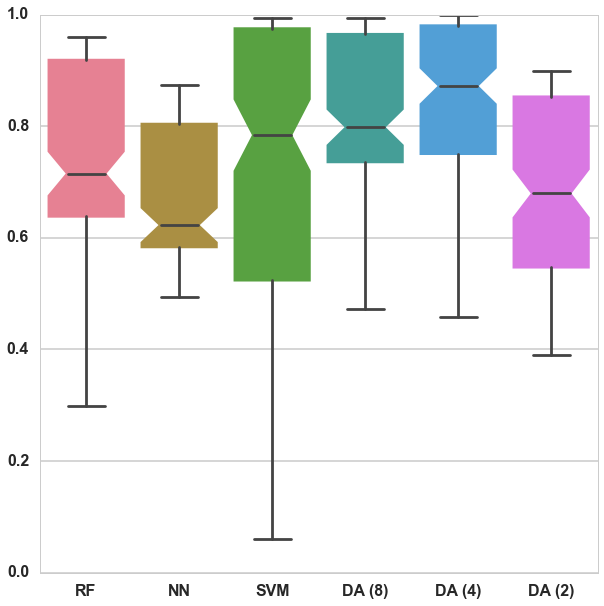

In [62]:
df = load_data('2')
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier, 
               'DA (8)', 'DA (4)', 'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})
results_df = four_col.loc[(four_col['effects'] == 2)]
results_df.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)

print(results_df.mean())
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("poster")
g = sns.boxplot(data=results_df, palette="husl", notch=True)
# g.set_title('ROC AUC - Model 2')

A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')
[ 2.  5.]
RF        0.519916
NN        0.508914
SVM       0.498699
DA (8)    0.494790
DA (4)    0.495990
DA (2)    0.496313
dtype: float64
RF        0.756767
NN        0.684536
SVM       0.696981
DA (8)    0.833889
DA (4)    0.849974
DA (2)    0.694782
dtype: float64
RF        0.504416
NN        0.510592
SVM       0.497323
DA (8)    0.493892
DA (4)    0.502893
DA (2)    0.502792
dtype: float64
RF        0.529613
NN        0.512605
SVM       0.525204
DA (8)  

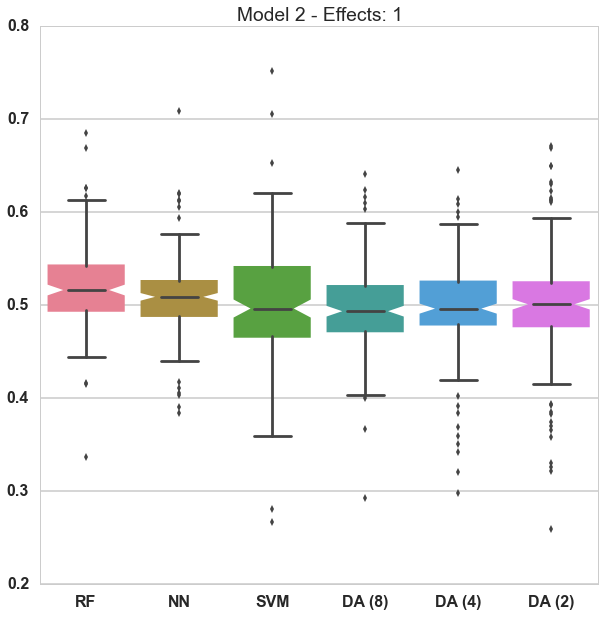

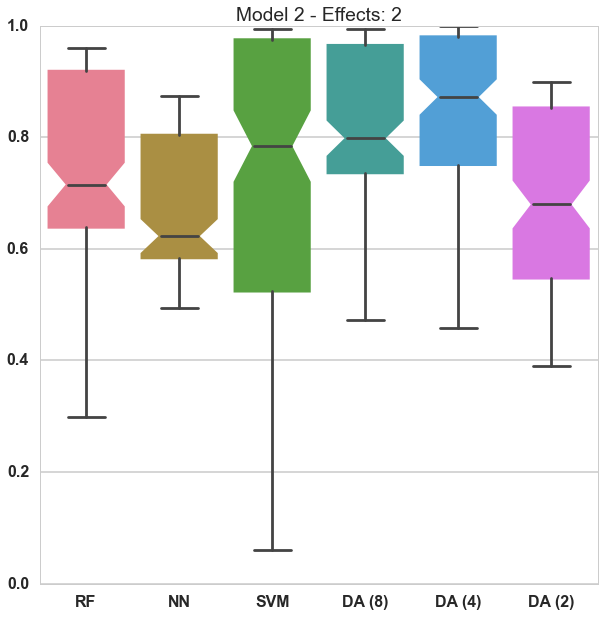

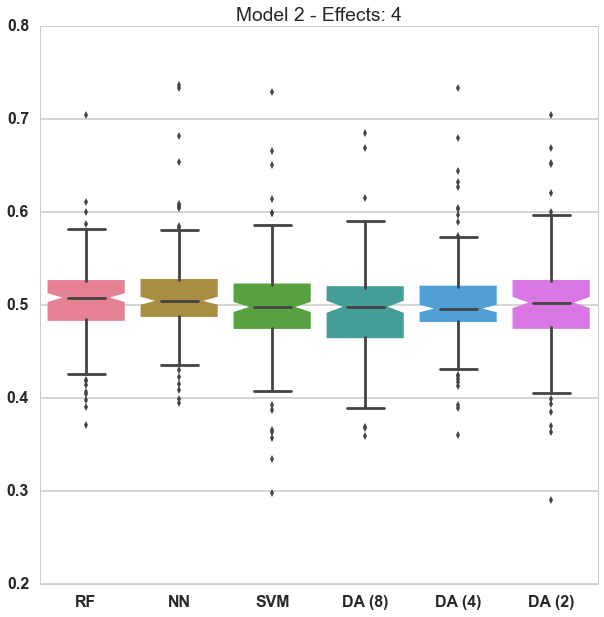

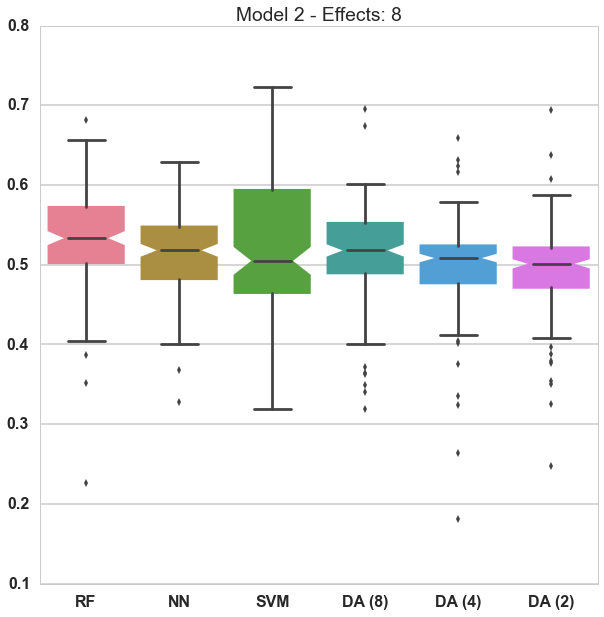

In [63]:
df = load_data('2')
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier, 
               'DA (8)', 'DA (4)', 'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

print(four_col['mag'].unique())

for e in four_col['effects'].unique():
    results_df = pd.DataFrame()
    df_select = four_col.loc[(four_col['effects'] == e)]
    df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)
    results_df = pd.concat([results_df, (df_select)])
    
    print(results_df.mean())
    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=results_df, palette="husl", notch=True)
    g.set_title('Model 2 - Effects: ' + str(e))

B.) Model 3 -
Recommend limiting to higher magnitude (methods look more even because there are simulations where no model can effectively classify)

A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')
(240, 9)
(60, 6)
(120, 6)
(180, 6)
(240, 6)
RF        0.739187
NN        0.713393
SVM       0.700780
DA (8)    0.777513
DA (4)    0.788780
DA (2)    0.750169
dtype: float64


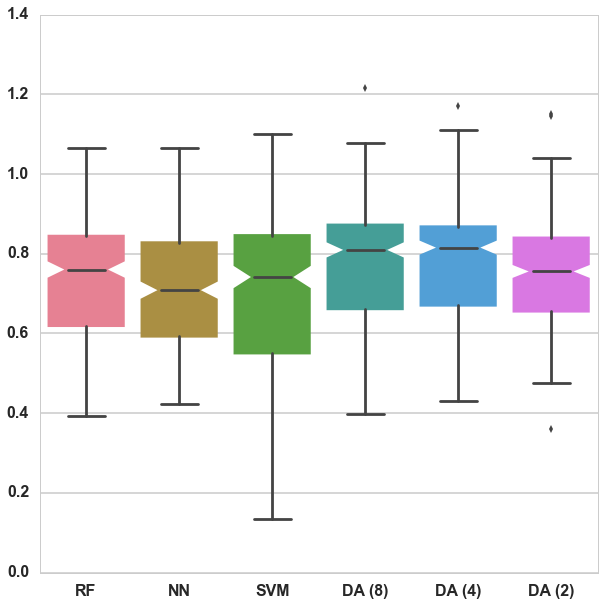

In [64]:
df = load_data('3')
# Randomness 
expected_e = {1:1, 2: 1, 4:0.6875, 8:0.64, 16:0.6}
results_df = pd.DataFrame()
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier,
                   'DA (8)', 'DA (4)', 'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

print(four_col.shape)
for e in four_col['effects'].unique():
    df_select = four_col.loc[(four_col['effects'] == e)]
    df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)

    results_df = pd.concat([results_df, (df_select / expected_e[e])])
    print(results_df.shape)

print(results_df.mean())
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("poster")
g = sns.boxplot(data=results_df, palette="husl", notch=True)
# g.set_title('Percent of Expected Max Classification')

C.) Model 4 - This model is very difficult to classify (turn magnitude up and limit number of effects for best results). You could also threshold where no model learns (all below 0.6) or something similar

A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


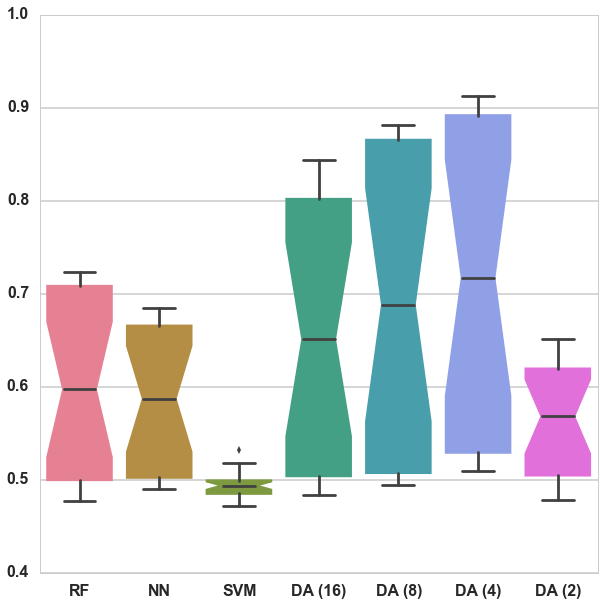

In [65]:
df = load_data('4')

results_df = pd.DataFrame()
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier,
                   'DA (16)', 'DA (8)', 'DA (4)',
                   'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

df_select = four_col
df_select = four_col.loc[(four_col['effects'] <= 4) & (four_col['patients']== 2000)]
df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)

results_df = pd.concat([results_df, (df_select)])
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("poster")
g = sns.boxplot(data=results_df, palette="husl", notch=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


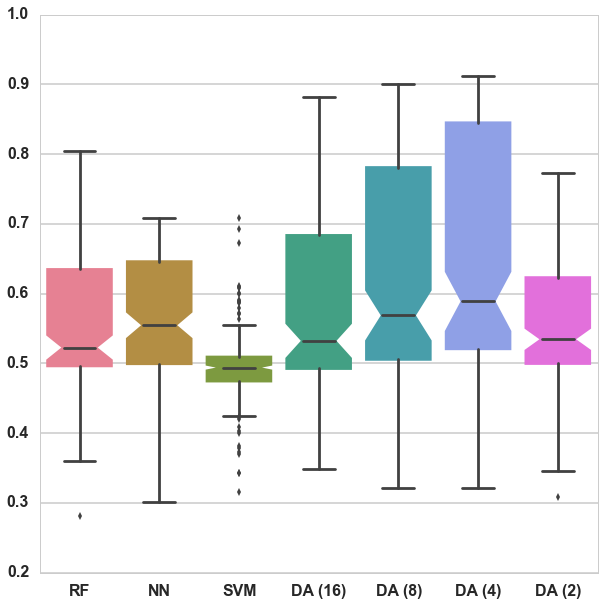

In [66]:
df = load_data('4')

results_df = pd.DataFrame()
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier,
                   'DA (16)', 'DA (8)', 'DA (4)',
                   'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

df_select = four_col
df_select = four_col.loc[(four_col['effects'] <= 4)]
df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)

results_df = pd.concat([results_df, (df_select)])
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set_context("poster")
g = sns.boxplot(data=results_df, palette="husl", notch=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Index(['da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')
(210, 10)
RF         0.623051
NN         0.635566
SVM        0.479886
DA (16)    0.679227
DA (8)     0.740372
DA (4)     0.814276
DA (2)     0.616388
dtype: float64
RF         0.561109
NN         0.566708
SVM        0.494420
DA (16)    0.589816
DA (8)     0.622370
DA (4)     0.664851
DA (2)     0.554320
dtype: float64
RF         0.5

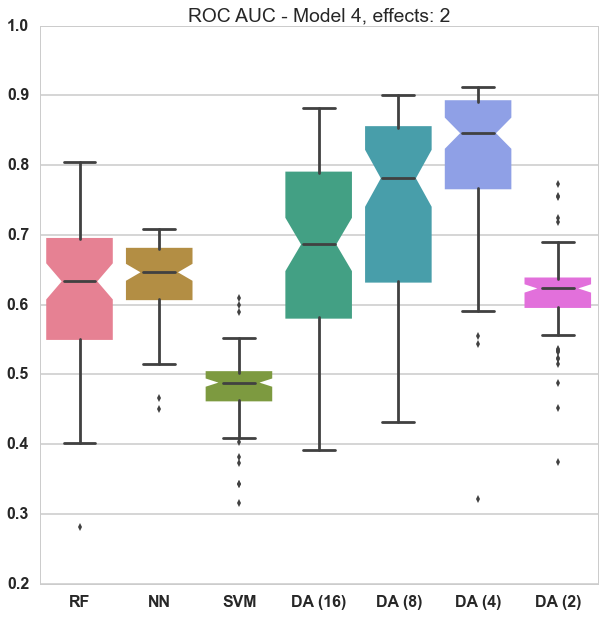

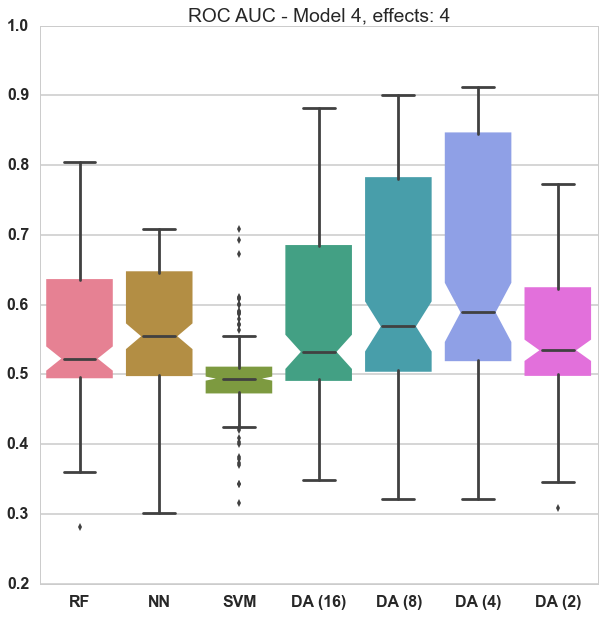

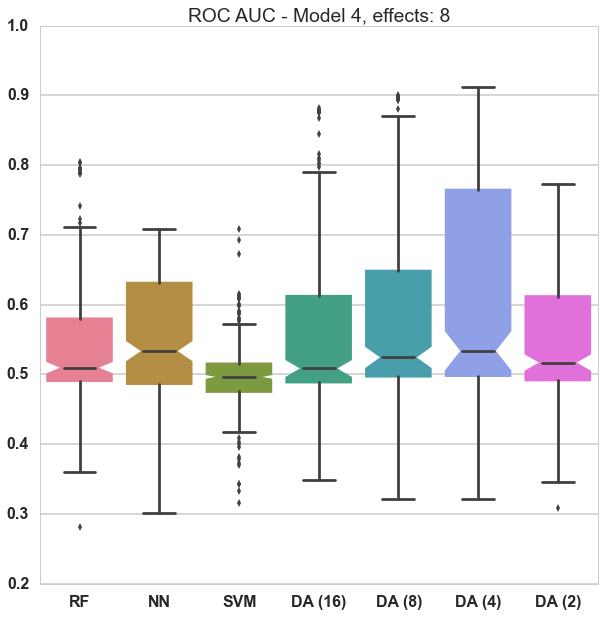

In [67]:
df = load_data('4')
four_col = df[['effects', 'mag', 'patients', 'Random Forest', 'Nearest Neighbors', comparison_classifier,
                   'DA (16)', 'DA (8)', 'DA (4)',
                   'DA (2)']]
four_col = four_col.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})

results_df = pd.DataFrame()
print(four_col.shape)
for e in four_col['effects'].unique():
    df_select = four_col.loc[(four_col['effects'] == e)]
    df_select.drop(['effects', 'mag', 'patients'], axis=1, inplace=True)
    results_df = pd.concat([results_df, (df_select)])
    
    print(results_df.mean())
    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=results_df, palette="husl", notch=True)
    g.set_title('ROC AUC - Model 4, effects: ' + str(e))

### FIgure 5 - Missing Data

Index(['da_10000_16_fullrfc', 'da_10000_16_nearest_neighbors',
       'da_10000_16_rfc', 'da_10000_16_svm', 'da_10000_16_tree',
       'da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


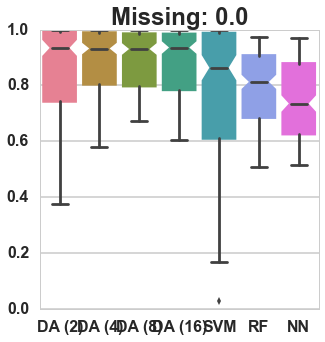

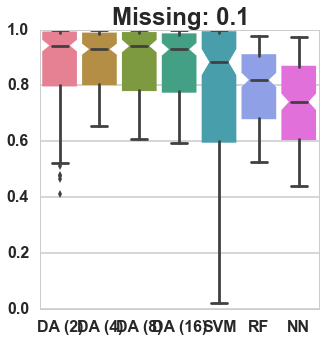

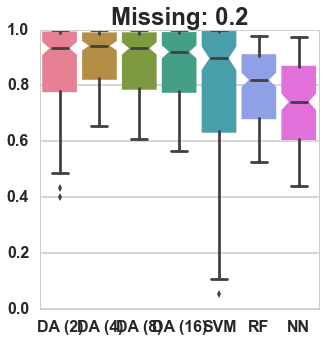

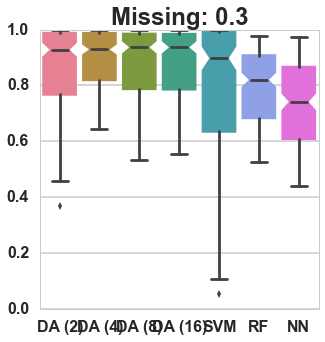

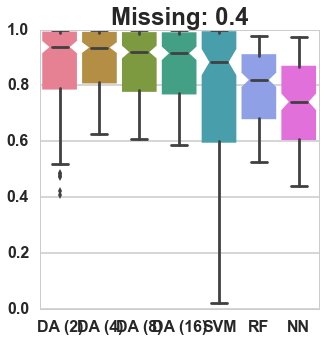

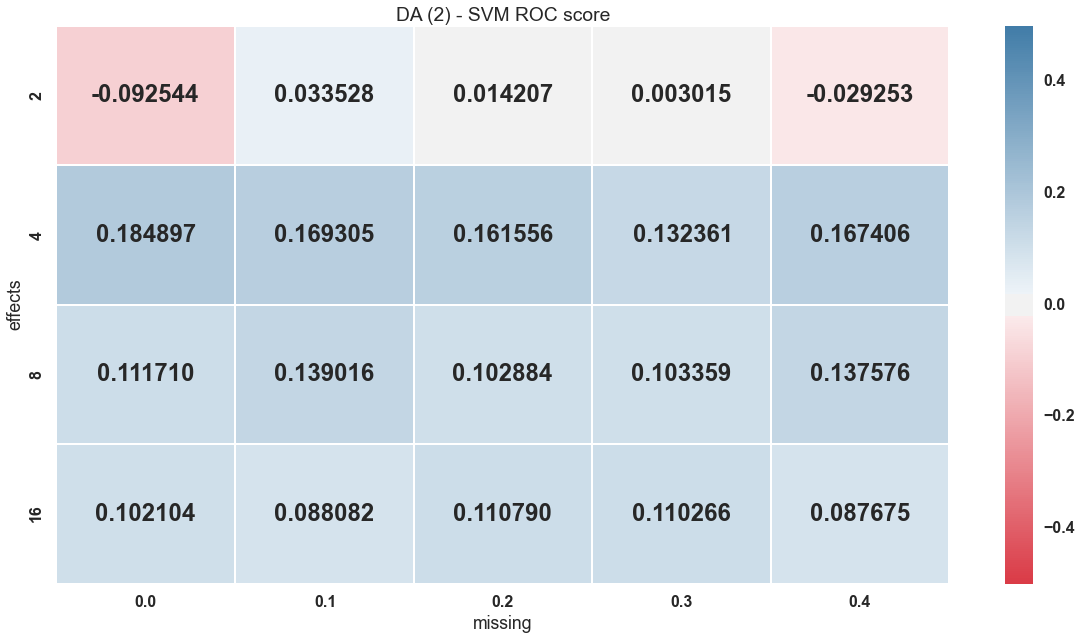

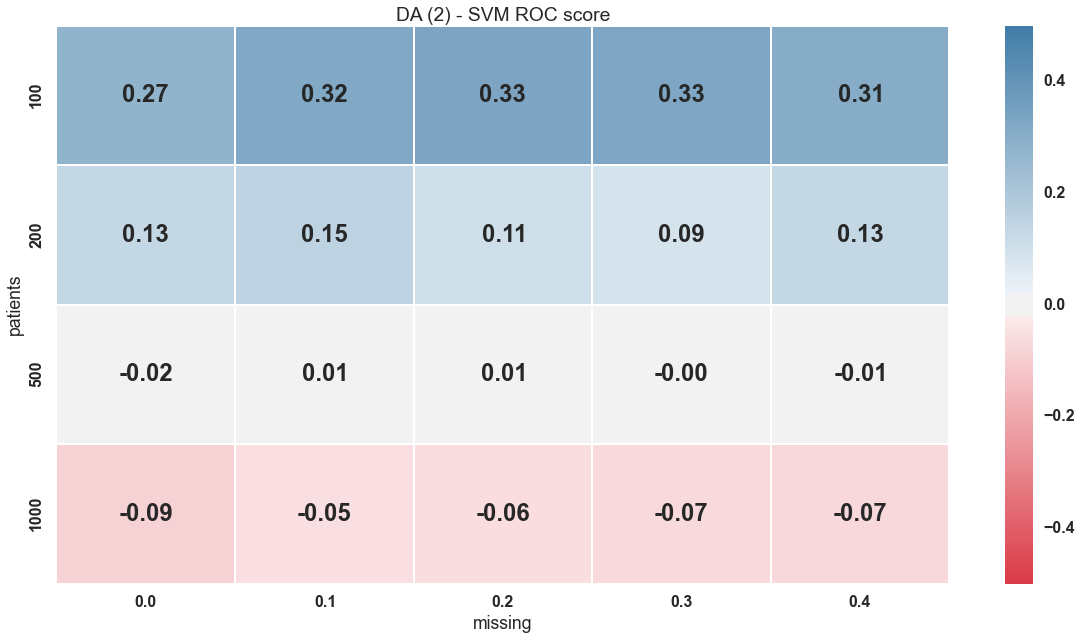

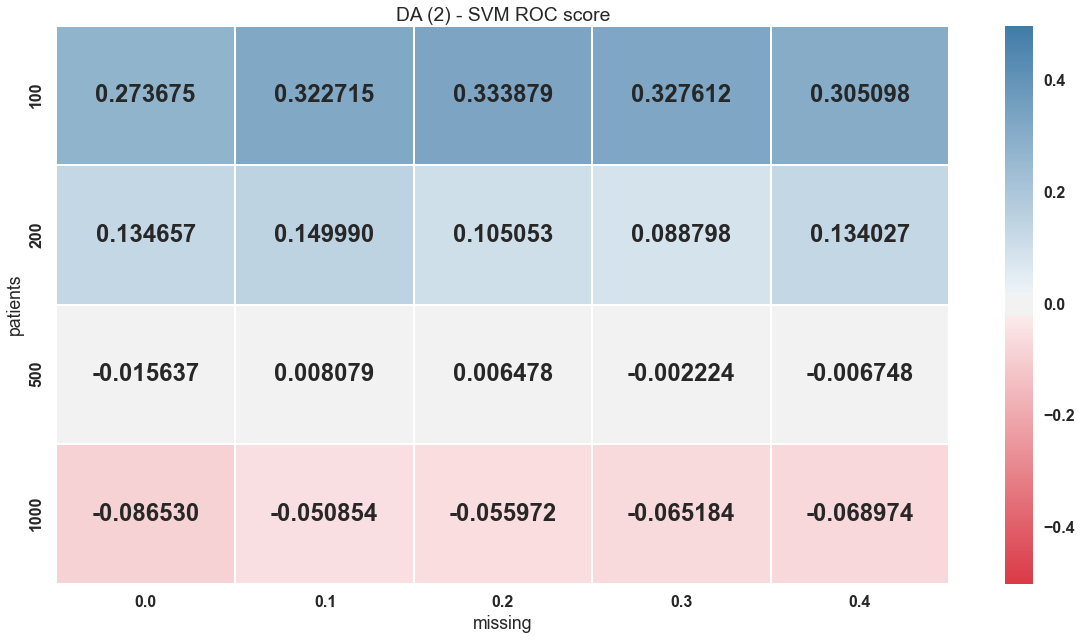

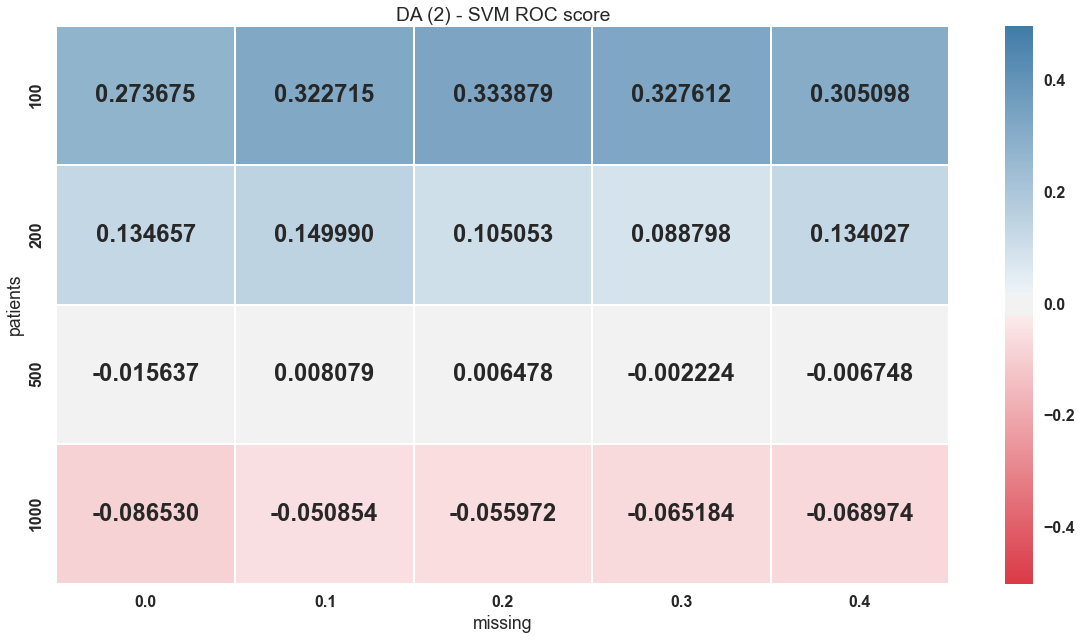

In [68]:
df = load_data('1_md')

# print(df.shape)
# print(df[['missing', 'diff']])

hidden_nodes = [1, 2, 4, 8, 16]
da_classifier_list = []
for n in hidden_nodes:
    da = 'DA (' + str(n) + ')'
    if (da in df.columns):
        da_classifier_list.append(da)

methods = da_classifier_list + [comparison_classifier, 'RF', 'NN']
for m in df['missing'].unique():
    df = df.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})
    df_select = df.loc[(df['missing'] == m)] # & (df['effects'] == 2)]
    vals = df_select[methods]
    plt.figure(figsize=(5,5))
    plt.rc('font', **font)
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=vals, notch=True, palette="husl")
    g.set_title('Missing: ' + str(m), fontdict=font)

plt.figure(figsize=(20,10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="effects", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt="f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

plt.figure(figsize=(20,10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt=".2f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

# diff for number of nodes 
# diff_2_4 =
# diff_4_8 =

plt.figure(figsize=(20, 10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt="f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

plt.figure(figsize=(20, 10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt="f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

Index(['da_10000_2_fullrfc', 'da_10000_2_nearest_neighbors', 'da_10000_2_rfc',
       'da_10000_2_svm', 'da_10000_2_tree', 'da_10000_4_fullrfc',
       'da_10000_4_nearest_neighbors', 'da_10000_4_rfc', 'da_10000_4_svm',
       'da_10000_4_tree', 'da_10000_8_fullrfc', 'da_10000_8_nearest_neighbors',
       'da_10000_8_rfc', 'da_10000_8_svm', 'da_10000_8_tree', 'effects',
       'fullrfc', 'mag', 'missing', 'model', 'nearest_neighbors', 'observed',
       'patients', 'per_effect', 'rfc', 'svm', 'tree', 'trial'],
      dtype='object')


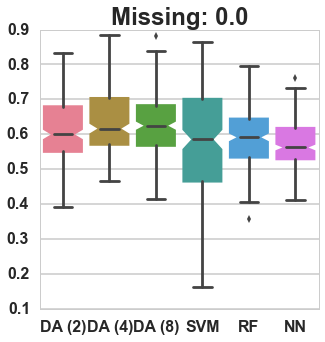

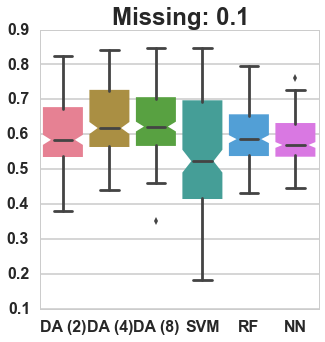

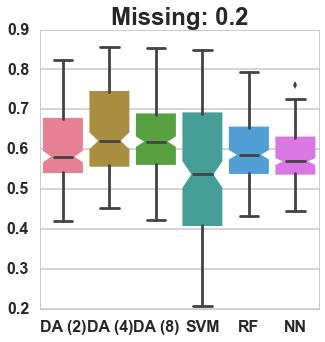

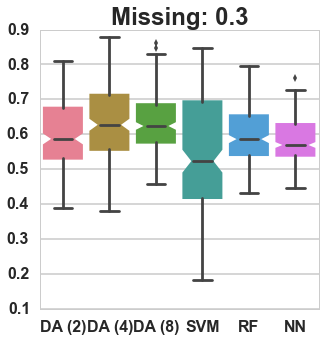

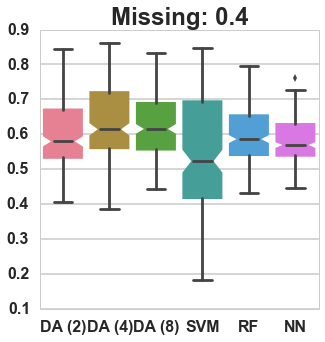

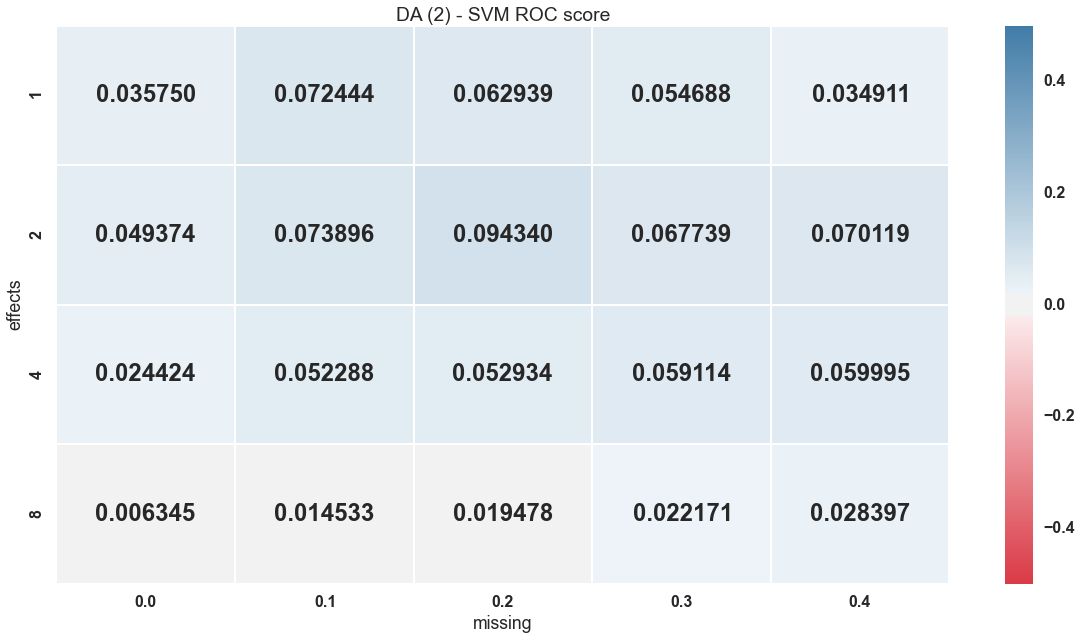

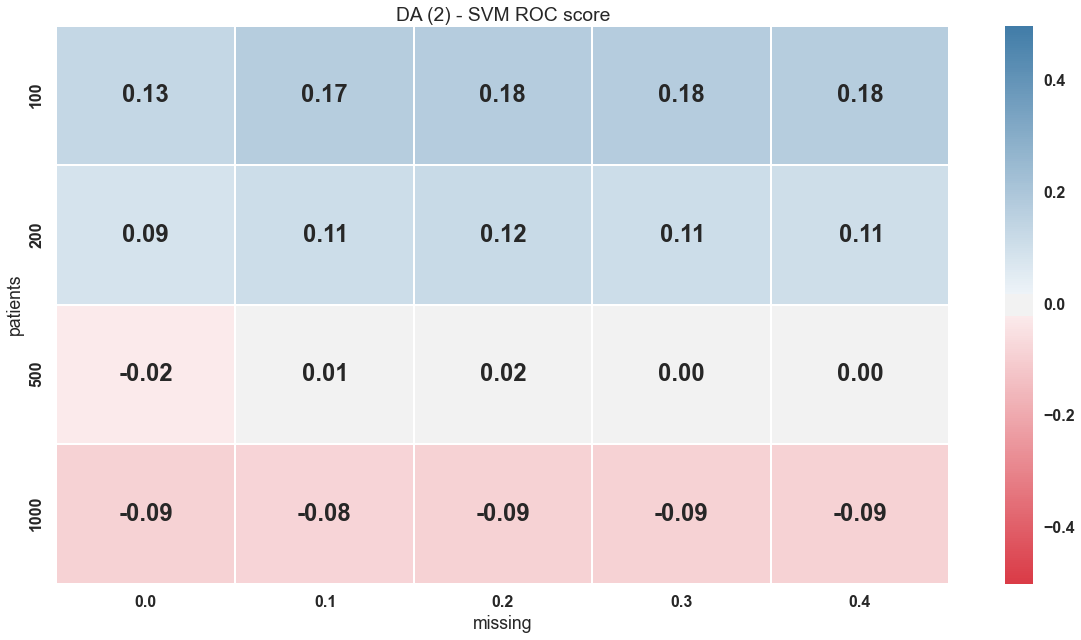

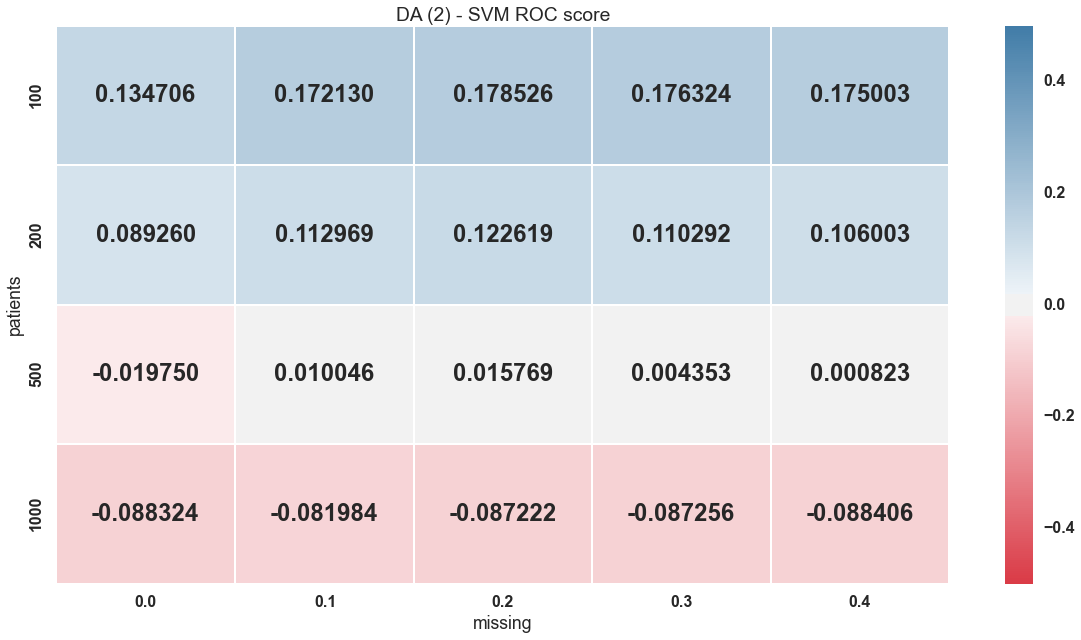

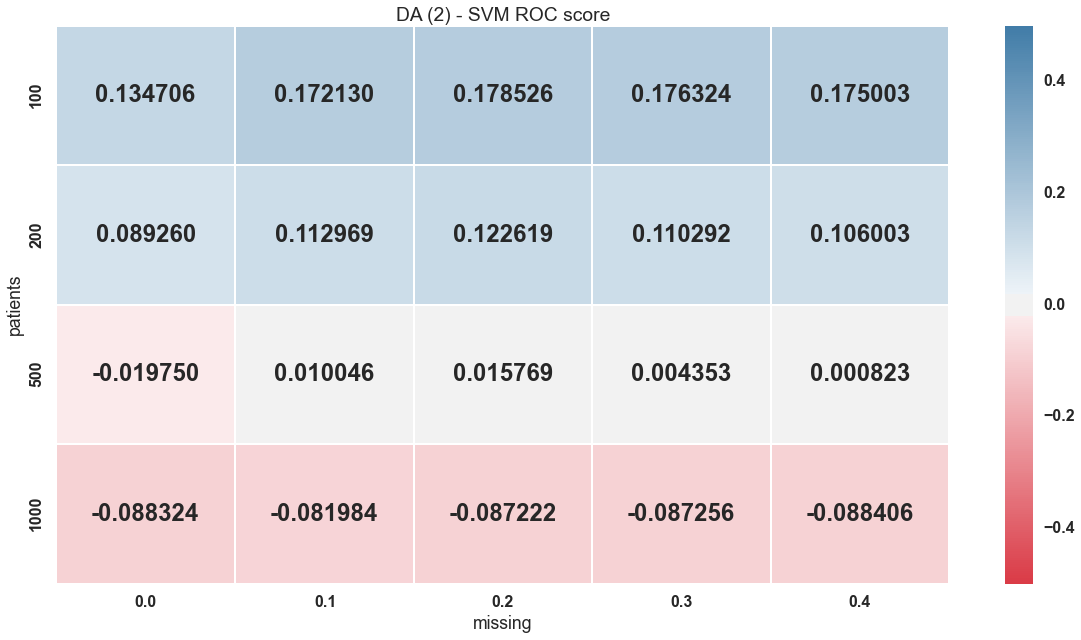

In [69]:
df = load_data('3_md')

# print(df.shape)
# print(df[['missing', 'diff']])

hidden_nodes = [1, 2, 4, 8, 16]
da_classifier_list = []
for n in hidden_nodes:
    da = 'DA (' + str(n) + ')'
    if (da in df.columns):
        da_classifier_list.append(da)

methods = da_classifier_list + [comparison_classifier, 'RF', 'NN']
for m in df['missing'].unique():
    df = df.rename(columns={'Random Forest':'RF', 'Nearest Neighbors': 'NN', 'svm': 'SVM'})
    df_select = df.loc[(df['missing'] == m)] # & (df['effects'] == 2)]
    vals = df_select[methods]
    plt.figure(figsize=(5,5))
    plt.rc('font', **font)
    sns.set_style("whitegrid")
    sns.set_context("poster")
    g = sns.boxplot(data=vals, notch=True, palette="husl")
    g.set_title('Missing: ' + str(m), fontdict=font)

plt.figure(figsize=(20,10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="effects", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt="f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

plt.figure(figsize=(20,10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt=".2f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

# diff for number of nodes 
# diff_2_4 =
# diff_4_8 =

plt.figure(figsize=(20, 10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt="f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

plt.figure(figsize=(20, 10))
ax = plt.axes()
pt = df.pivot_table(values='diff', index="patients", columns="missing", aggfunc='mean')
sns.heatmap(pt, annot=True, fmt="f", cmap=cmap, vmin=-0.5, vmax=0.5, linewidths=.5)
ax.set_title(da_classifier + ' - ' + comparison_classifier + ' ROC score')

### Figure 6

In [88]:
# Redefine Scatter for 3 classes
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(3):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

RS = 123
plot_count = 600
directory = './data/5/patients/'
file_name = directory + '5_8_5_5_200_0.p'

with open(file_name, 'rb') as f:
    p_array = pkl.load(f)
classes = p_array[:, -1]
print(p_array.shape, classes[(0 == classes)].size, classes[(1 == classes)].size)

X = p_array[:plot_count, :-1]
y = p_array[:plot_count, -1].astype(int)

(15000, 201) 5000 5000


A.) Input

(<matplotlib.figure.Figure at 0x11d054fd0>,
  <matplotlib.text.Text at 0x11a54bcf8>])

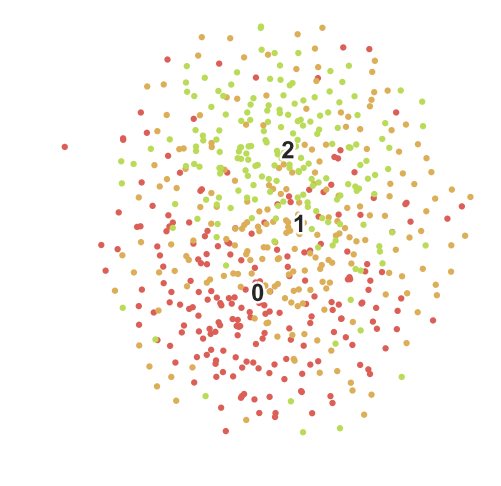

In [89]:
X_tsne = np.vstack([X[y==i]
               for i in range(3)])
y_tsne = np.hstack([y[y==i]
               for i in range(3)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)

B.) 2 Hidden Nodes

(<matplotlib.figure.Figure at 0x118f3bc18>,
  <matplotlib.text.Text at 0x11a282630>])

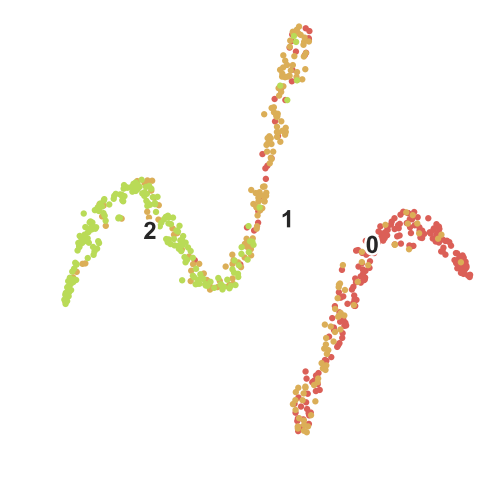

In [93]:
i_theano = T.dmatrix('i_theano')
f = open('./data/5/trained/2_1000.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(3)])
y_tsne = np.hstack([y[y==i]
               for i in range(3)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)

C.) 3 Hidden Nodes

(<matplotlib.figure.Figure at 0x11d92acc0>,
  <matplotlib.text.Text at 0x118099f28>])

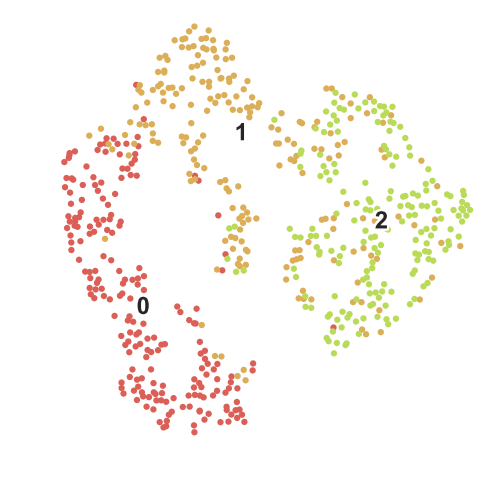

In [94]:
i_theano = T.dmatrix('i_theano')
f = open('./data/5/trained/3_1000.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(3)])
y_tsne = np.hstack([y[y==i]
               for i in range(3)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)

D.) 4 Hidden Nodes

(<matplotlib.figure.Figure at 0x1193ae8d0>,
  <matplotlib.text.Text at 0x11a264668>])

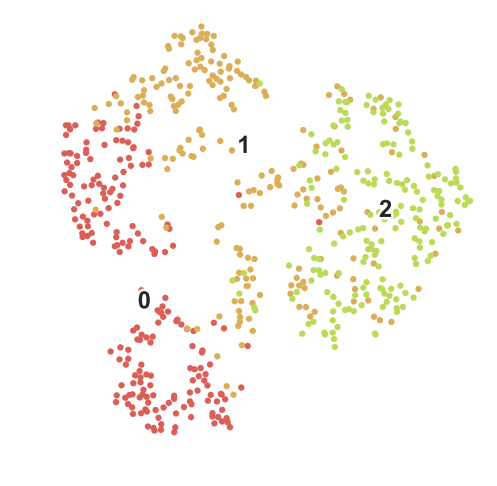

In [95]:
i_theano = T.dmatrix('i_theano')
f = open('./data/5/trained/4_1000.p', 'rb')
da = pkl.load(f)

get_hidden = da.get_hidden_values(i_theano)
f = theano.function([i_theano], [get_hidden])
x_hidden = f(X)[0]

X_tsne = np.vstack([x_hidden[y==i]
               for i in range(3)])
y_tsne = np.hstack([y[y==i]
               for i in range(3)])

proj2 = TSNE(random_state=RS, init='pca').fit_transform(X_tsne)
scatter(proj2, y_tsne)